<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Изучим данные, представленные сервисом.

## Загрузка данных

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

def info_df(df):  
    display(df.head()) # первые пять строк 
    display(df.info()) # общую информацию 
    display(df.describe()) # статистическую информацию 
    display(df.isna().sum()) # пропуски 
    display(df.duplicated().sum()) # дубликаты 
                     
display(info_df(df))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

153

None

После изучения данных, видим: данные представлены 5 столбцами в датасете по 500 значений в каждом. Возраст и зарплата предстиавлены числом с плавающей запятой. ДЛя более точных исчислений риведём их к целочисленному типу. Также стоит преименовать столбцы, поскольку написаны по русски и регистр не низкий. А также есть дубликаты, их стоит удалить.

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

In [3]:
# переименуем столбцы и приведём к нижнему регистру 
df = df.rename(columns={ 
                  "Пол": "gender", 
                  "Возраст": "age", 
                  "Зарплата": "salary", 
                  "Члены семьи": "family_members", 
                  "Страховые выплаты": "insurance_payments"}) 
 
df.head()

,gender,age,salary,family_members,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df['age'] = df['age'].astype('int') 
df['salary'] = df['salary'].astype('int') 
  
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              5000 non-null   int64
 1   age                 5000 non-null   int64
 2   salary              5000 non-null   int64
 3   family_members      5000 non-null   int64
 4   insurance_payments  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

<AxesSubplot:>

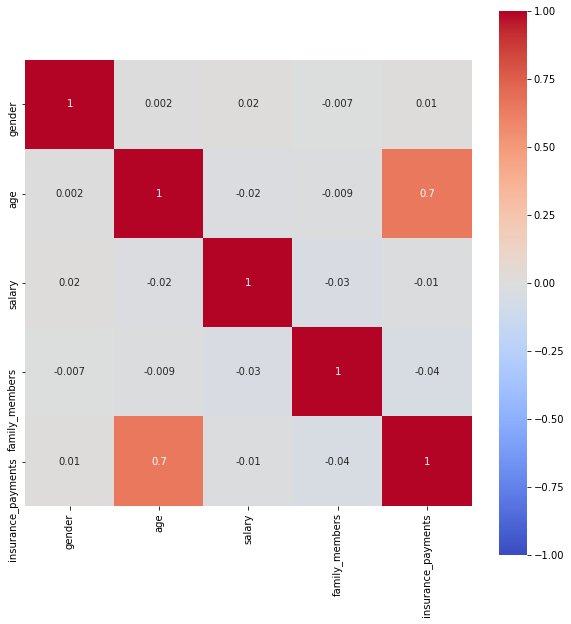

In [6]:
# смотрим матрицу корреляции по всему датасету 
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax) 

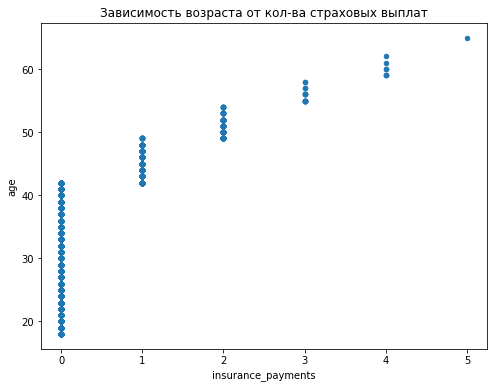

In [7]:
# посмотрим на коррелирующие столбцы
df.plot(x='insurance_payments', y='age', kind='scatter', figsize=(8, 6))
plt.title("Зависимость возраста от кол-ва страховых выплат") 
plt.show()

Мы видим одну только пару коррелирующую: возраст и страховые выплаты. Страховые выплаты начинаются у клиентов старше 40 лет. Причём у клиентов до 40 лет выплат не было вообще.

In [8]:
# Построим графики чтобы посмотреть на распределение
def dist_and_box(df,col):
    global title
    fig, axs = plt.subplots(ncols=2,figsize=(20,5))
    sns.set(font_scale=1.10)
    distplot = sns.distplot(df[col],ax=axs[0]).set_title(f'Признак {title}',fontsize=20);
    sns.boxplot(df[col], ax=axs[1]).set_title(f'Признак {title}',fontsize=20)

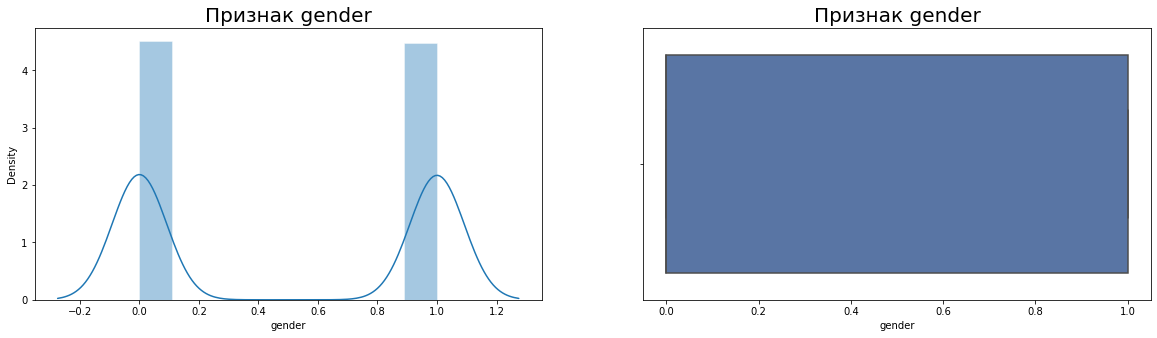

In [9]:
# здесь и далее по каждому столбцу
df = df
title = 'gender'

dist_and_box(df,'gender')

Два пика с норальным распределением, выбросов нет. Это логично,у нас два признака только.

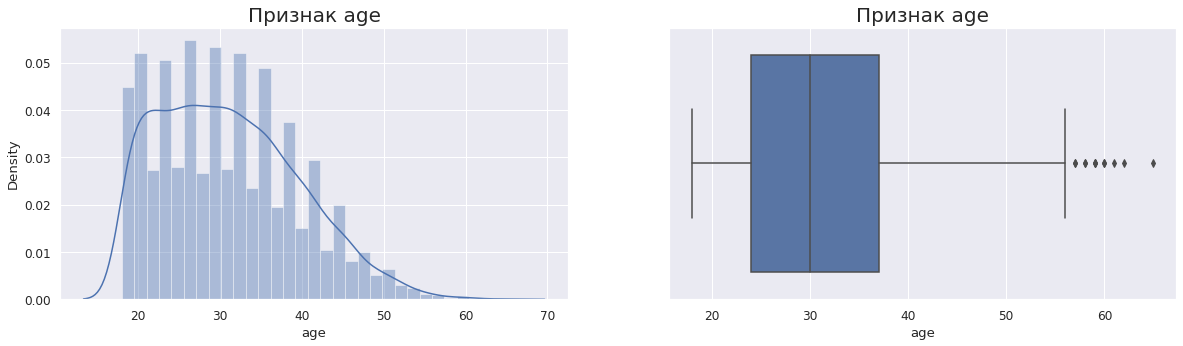

In [10]:
df = df
title = 'age'

dist_and_box(df,'age')

У признака возраст распределение не совсем нормально и скошено вправо, о чём и свидетельствуют выбросы. Множественные пики в значениях от 20 до 50. Это какие-то немногочисленные клиенты.

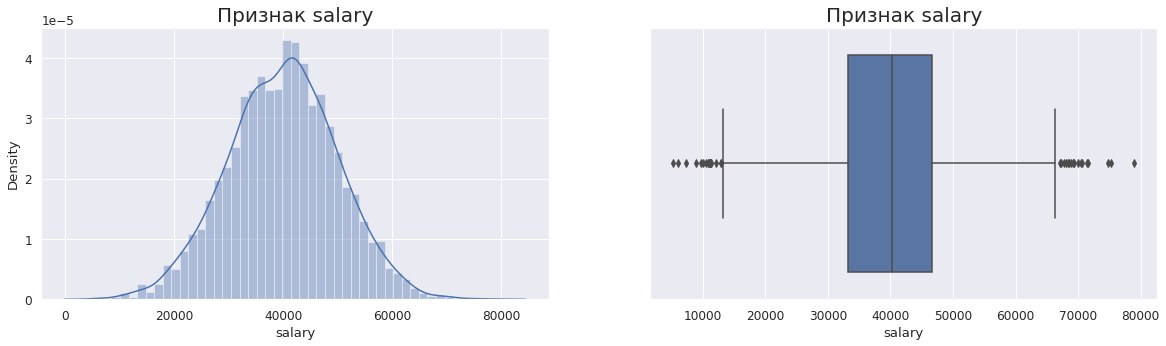

In [11]:
df = df
title = 'salary'

dist_and_box(df,'salary')

У признака зарплата нормальное распределение, однако есть выбросы. Но это можно описать как единичные клиенты с высокой зарплатой.

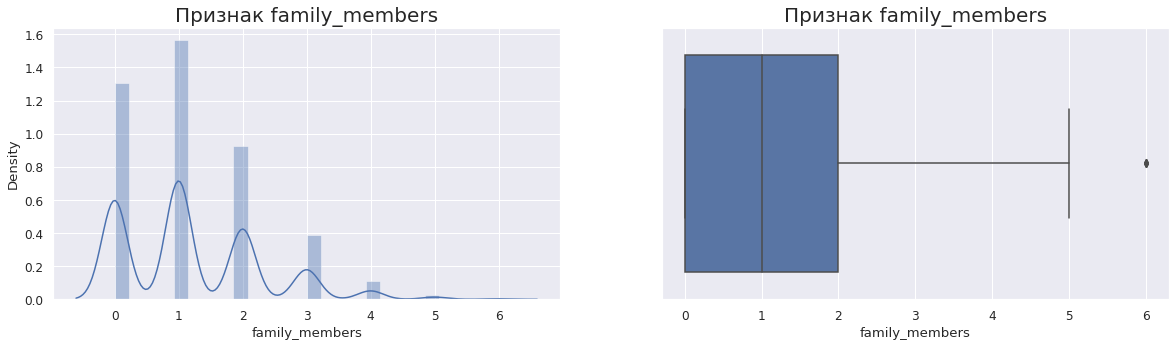

In [12]:
df = df
title = 'family_members'

dist_and_box(df,'family_members')

Соответствующие пики в признаке члены семьи с нормальным распределением. Выброс есть в значении 6. Но это просто редкие случаи когда семья в составе 6 человек.

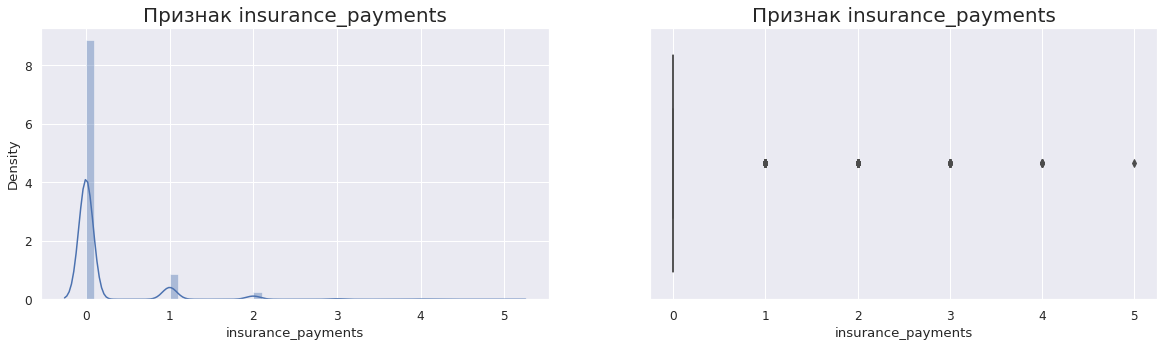

In [13]:
df = df
title = 'insurance_payments'

dist_and_box(df,'insurance_payments')

В признаке количестов страховых выплат за последние 5 лет, значимый пик на значении 0 - то есть страховых выплат было немного. Страховые выплаты представлены отдельными выбросами, потому что их немного.

**Вывод**

По первому пункту, открыли и изучили данные. Удалили дубликаты, посмотрели распределение и описали его по каждому признаку. Нашли одну коррелирующую пару - возраст и кол-во страховых выплат. Страховые выплаты начинаются у клиентов старше 40 лет. Причём у клиентов до 40 лет выплат не было вообще.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.


**Ответьте на вопрос и обоснуйте решение.**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не меняется, но меняются веса для новых признаков (w1).

**Обоснование:**

Так как признаки $Х$ умножают на обратимую матрицу $Р$, то примем $X_1 = XP$ и подставим в формулу обучения:

$$
w_1 = ((XP)^TXP)^{-1}(XP)^Ty =>
$$

$$
w_1 = (P^TX^TXP)^{-1}P^TX^Ty =>
$$

Матрицы $X$  и $X^T$ прямоугольные, поэтому для них не существует обратных матриц, а матрица $P$ квадратная. Вынести из формулы множители в виде обратимых матриц $Р$ можно.

$$
w_1 = (P^T(X^TX)P)^{-1}P^TX^Ty =>
$$

$$
w_1 = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty =>
$$

Так как $(P^T)^{-1} P^T$ это единичная матрица и мы её сокращаем, то остаётся следующее

$$
w_1 = P^{-1}(X^TX)^{-1}X^Ty =>
$$

а так как $(X^TX)^{-1}X^Ty$ это веса, то

$$
w_1 = P^{-1}w
$$

**Подставим полученное выражние в формулу предсказания $a = Xw$:**

$$
a_1 = XPP^{-1}w
$$

так как $XP = X_1$, а $P^{-1}w = w1$, то


$$
a_1 = X_1w_1
$$

**Вывод**

По пункту 2 ответили на вопрос про качество линейной регрессии и обосновали выводы. Качество линейной регрессии не меняется, но меняются веса для новых признаков ($w_1$).

## Алгоритм преобразования

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

**Алгоритм**

Создадим квадратную матрицу А, и посмотрим, обратима ли она.

In [14]:
# рандомная матрица
matrix_a = np.random.randint(100, size = (4,4))
matrix_a

array([[50, 48, 41, 33],
       [65, 75, 85, 12],
       [76,  5, 44, 21],
       [26, 37, 68, 52]])

In [15]:
# обратная матрица
np.linalg.inv(matrix_a)

array([[ 0.01132308, -0.00243207,  0.0116667 , -0.0113361 ],
       [ 0.02256627,  0.00440142, -0.01550617, -0.00907451],
       [-0.03127864,  0.0122781 ,  0.00493781,  0.01502238],
       [ 0.01918453, -0.01797172, -0.00125725,  0.01171103]])

**Обоснование**

Чтобы убедиться, что качество линейной регрессии не изменится, рассчитаем a и a1 на наших данных.

$$
a = Xw
$$

$$
w = (X^T X)^{-1} X^T y
$$

$$
a_1 = XPP^{-1}w
$$

$$
w_1 = ((XP)^TXP)^{-1}(XP)^Ty
$$

In [16]:
# выделям признаки и цель
features = df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

display(features.shape)
display(target.shape)

(4847, 4)

(4847,)

In [17]:
# считаем вектор весов и вектор предсказания до преобразования
w = np.linalg.inv(np.dot(features.T,features)).dot(features.T).dot(target)
a = features.dot(w)

In [18]:
# считаем вектор весов и вектор предсказания после преобразования
w1 = np.linalg.inv(np.dot(features.dot(matrix_a).T,features.dot(matrix_a))).dot(features.dot(matrix_a).T).dot(target)
a1 = features.dot(matrix_a).dot(w1)

Определим равны ли два массива по элементам в пределах заданного допуска методом NumPy allclose ().

Возвращаемое значение: 

True, если два массива равны в пределах заданного допуска, иначе False.

In [19]:
np.allclose(a, a1, .1)

True

Использован относительный допуск как 0.1 и абсолютный допуск как 0.1. В заданном диапазоне допусков элементы массива получились одинаковы, и поэтому он возвращает True.

## Проверка алгоритма

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

In [20]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print("R2 метрика:", r2_score(target, predictions)) 

R2 метрика: 0.4302010046633359


In [21]:
features_transformed = features.dot(matrix_a)
model = LinearRegression()
model.fit(features_transformed, target)
predictions = model.predict(features_transformed)
print("R2 метрика:", r2_score(target, predictions))

R2 метрика: 0.43020100466333544


Применили метрику  R2 и убедились, что качество линейной регрессии не отличается до и после преобразования.

**Вывод**

В проекте необходимо было разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы. В качестве преобразования признаки были умножены на обратимую матрицу. Корректность работы алгоритма была обоснована равенством предсказаний и проверкой R2 метрики. При преобразовании качество модели не ухудшилось.